In [91]:
import pandas as pd
import seaborn as sns

In [93]:
df=sns.load_dataset('iris')

In [94]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [96]:
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [97]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [98]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

In [101]:
X=df.drop('species',axis=1)
y=df['species']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42)

In [104]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [134]:
dt = DecisionTreeClassifier(max_depth=3)

In [136]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [138]:
import matplotlib.pyplot as plt

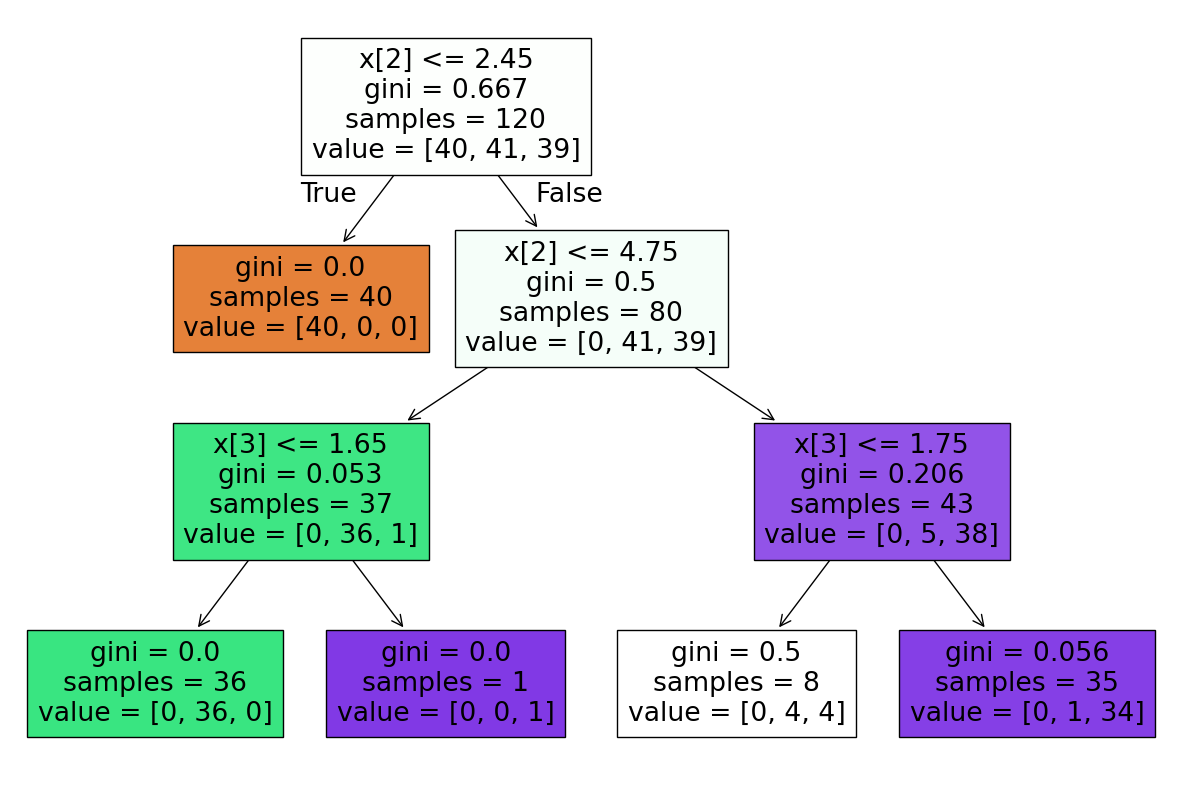

In [140]:
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True)
plt.show()

In [144]:
from sklearn.metrics import accuracy_score

In [146]:
y_pred=dt.predict(X_test)

In [148]:
acc=accuracy_score(y_test,y_pred)

In [150]:
acc

1.0

In [152]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [154]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64

In [197]:
parameter={
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2],
    "max_features":['auto','sqrt','log2']
}


In [199]:
from sklearn.model_selection import GridSearchCV

In [201]:
dt=DecisionTreeClassifier()
cv=GridSearchCV(dt,parameter,cv=5,scoring="accuracy")

In [203]:
cv.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [207]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2}